In [44]:
import pandas
from sklearn.tree import DecisionTreeClassifier
data = pandas.read_csv('titanic.csv',index_col='PassengerId')


In [45]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
data = data[['Pclass','Fare','Age','Sex','Survived']].dropna()

In [52]:
X = data[['Pclass','Fare','Age','Sex']]
X['Sex'] = X['Sex'].map({'male' : 1, 'female' : 0 })
y = data[['Survived']]

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [54]:
clf = DecisionTreeClassifier(random_state=241)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=241,
            splitter='best')

In [55]:
importances = clf.feature_importances_

In [56]:
importances


array([0.14000522, 0.30343647, 0.2560461 , 0.30051221])

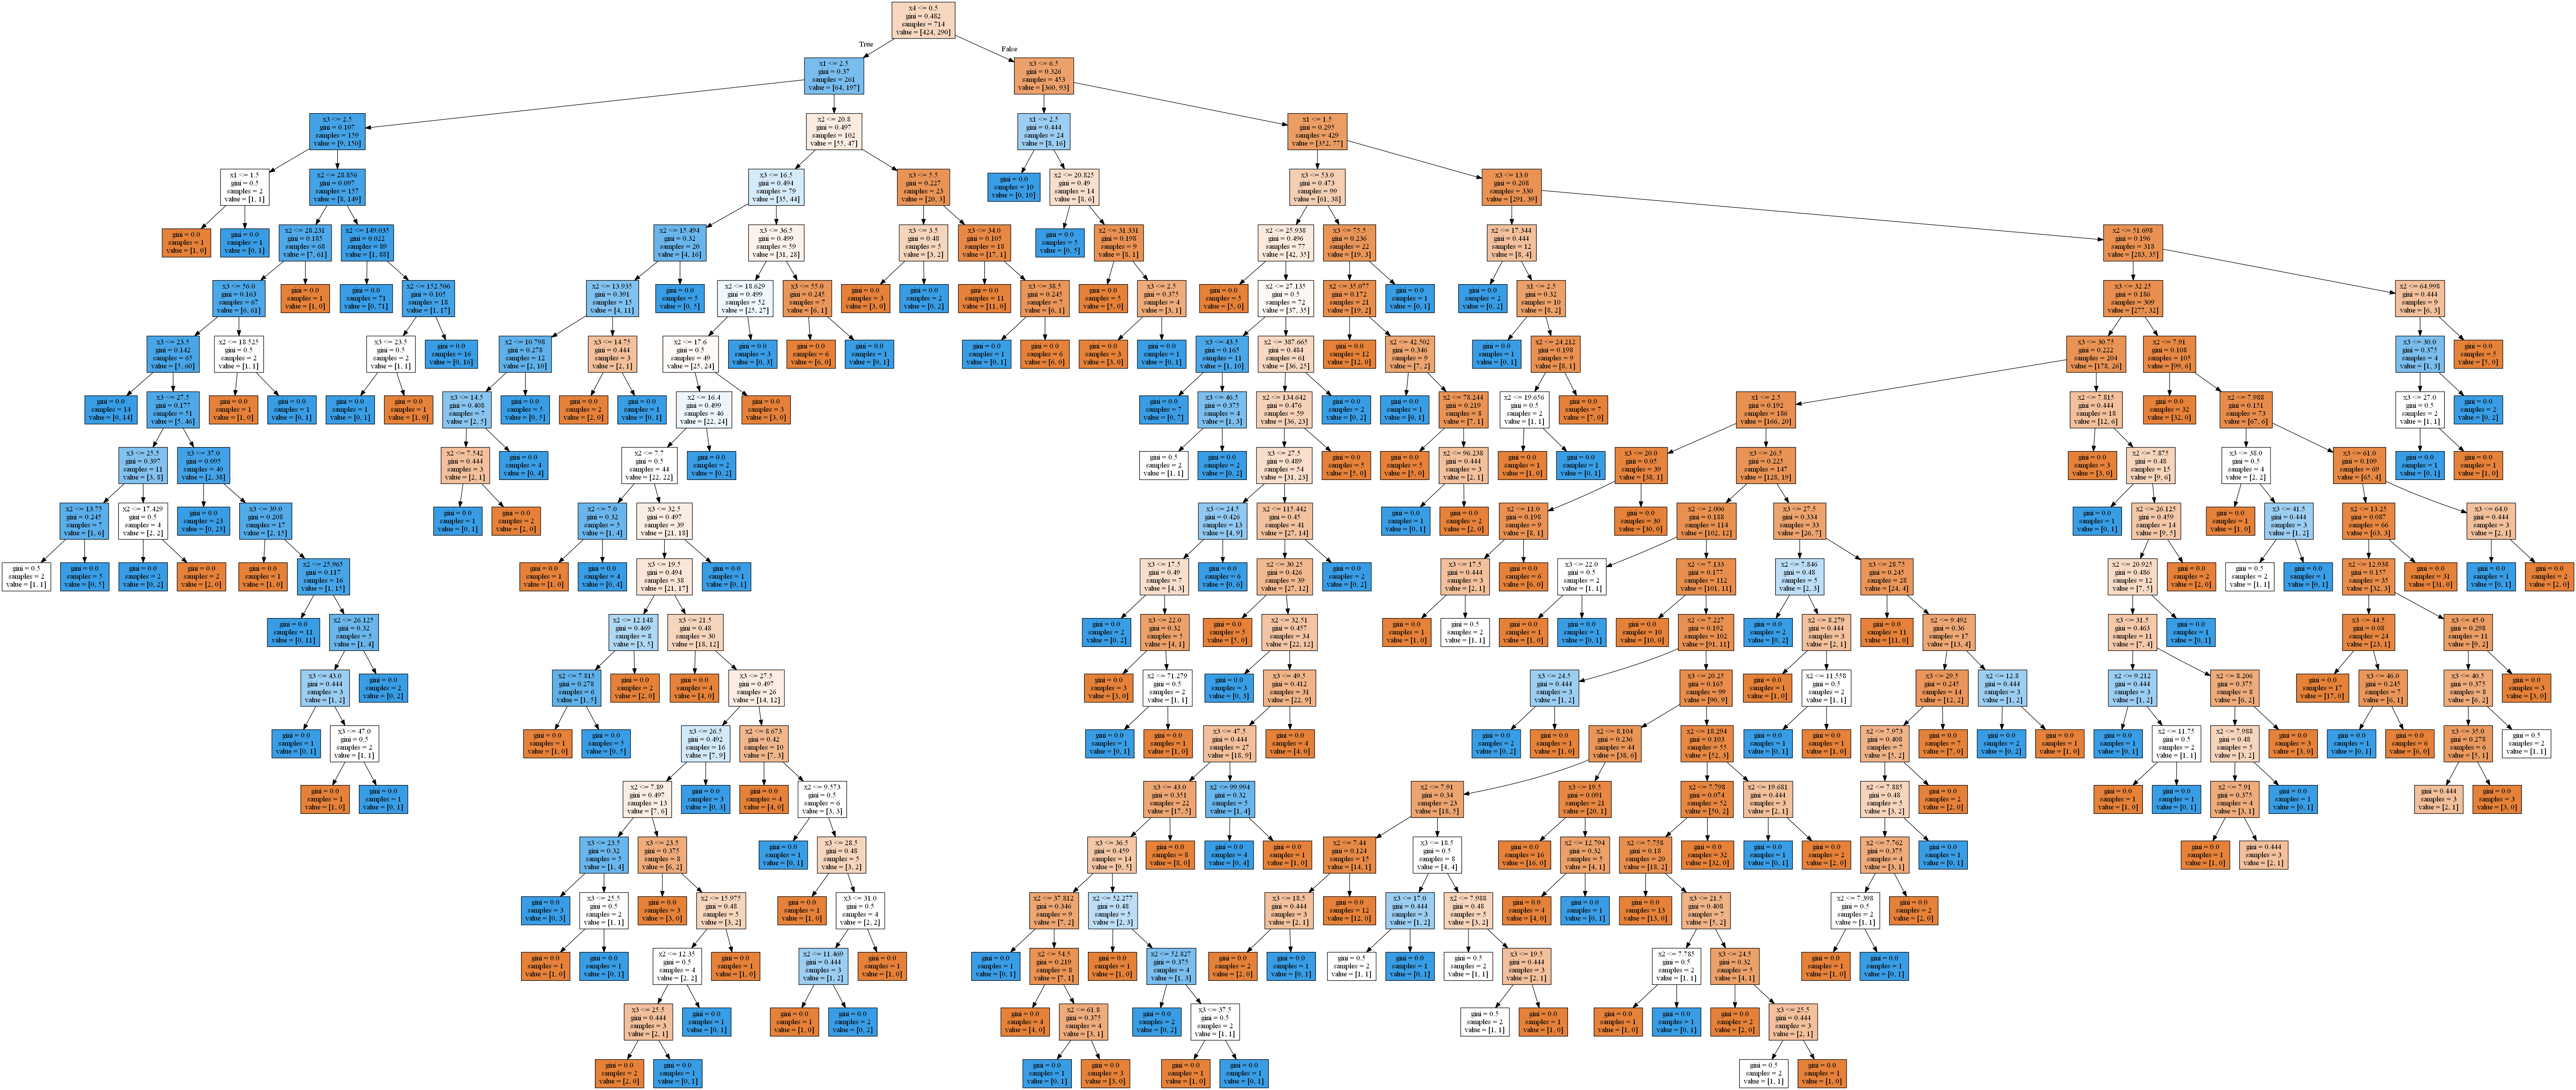

In [62]:
# используем .dot формат для визуализации дерева
from sklearn.tree import export_graphviz
export_graphviz(
    clf,
    feature_names=['x1', 'x2','x3', 'x4'],
    out_file='/small_tree.dot',
    filled=True)
# для этого понадобится библиотека pydot (pip install pydot)


import pydot
(graph,) = pydot.graph_from_dot_file('/small_tree.dot')
graph.write_png('/small_tree.png')

from IPython.core.display import Image, display
display(Image('/small_tree.png', unconfined=True))